# 1. Install Dependencies and Setup

In [2]:
!pip install tensorflow tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.3.1
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
astroid                   2.13.5
asttokens                 3.0.0
astunparse                1.6.3
async-lru                 2.0.5
attrs                     25.3.0
autopep8                  2.3.2
babel                     2.17.0
beautifulsoup4            4.13.4
black                     22.3.0
bleach                    6.2.0
certifi                   2025.7.9
cffi                      1.17.1
charset-normalizer        3.4.2
click                     8.1.3
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.2
coverage                  7.10.5
cycler                    0.12.1
debugpy                   1.8.14
decorator                 5.2.1
defusedxml                0.7.1
dill                      0.4.0
executing      

In [4]:
import tensorflow as tf  # TensorFlow ist das Framework für Deep Learning und wird für Modelltraining und -auswertung verwendet
import os                # Das os-Modul ermöglicht den Zugriff auf Betriebssystemfunktionen, z.B. zum Arbeiten mit Dateipfaden und Verzeichnissen

2025-08-25 19:06:28.538410: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-25 19:06:28.538739: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-25 19:06:28.582741: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-25 19:06:30.524763: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [5]:

# Hole eine Liste aller verfügbaren GPU-Geräte mit TensorFlow (experimentelles API)
gpus = tf.config.experimental.list_physical_devices('GPU')

# Für jede gefundene GPU wird das "Memory Growth" aktiviert.
# Das bedeutet, dass TensorFlow den GPU-Speicher bei Bedarf schrittweise erweitert,
# anstatt direkt den gesamten Speicher zu reservieren.
# Dies ist besonders nützlich, wenn mehrere Prozesse auf die GPU zugreifen oder
# wenn der Speicherbedarf des Modells variiert.
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2025-08-25 19:06:32.476086: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# Mit dieser Zeile wird eine Liste aller verfügbaren GPU-Geräte angezeigt,
# die von TensorFlow erkannt wurden. Dies ist hilfreich, um zu prüfen,
# ob TensorFlow die GPU korrekt erkennt und verwendet.
# Die Funktion gibt eine Liste von PhysicalDevice-Objekten zurück,
# z.B. [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [7]:
!apt-get update && apt-get install -y libgl1-mesa-glx

Reading package lists... Done
E: List directory /var/lib/apt/lists/partial is missing. - Acquire (13: Permission denied)


In [8]:
# Definiere das Verzeichnis, in dem die Bilddaten liegen.
# Dieses Verzeichnis wird später verwendet, um Bilder zu laden und zu verarbeiten.
data_dir = 'data' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
# Durchlaufe alle Unterverzeichnisse im Datenverzeichnis (jede Klasse entspricht einem Unterordner)
for image_class in os.listdir(data_dir): 
    # Durchlaufe alle Dateien im jeweiligen Klassen-Unterverzeichnis
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # Erzeuge den vollständigen Pfad zur Bilddatei
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            # Versuche, das Bild mit OpenCV zu laden
            img = cv2.imread(image_path)
            # Bestimme den tatsächlichen Bildtyp (Dateiendung) mit dem Modul imghdr
            tip = imghdr.what(image_path)
            # Überprüfe, ob die Bilddatei eine der erlaubten Endungen besitzt
            if tip not in image_exts: 
                # Falls nicht, gib eine Warnung aus und entferne die Datei
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e: 
            # Falls ein Fehler beim Laden oder Verarbeiten auftritt, gib eine Fehlermeldung aus
            print(f'Issue with image {image_path}: {e}')
            # Optional: Entferne die fehlerhafte Datei (auskommentiert, um Datenverlust zu vermeiden)
            # os.remove(image_path)

Issue with image data/sad/280-2804580_sad-people-png-sad-person-png-transparent-png.png: name 'cv2' is not defined
Issue with image data/sad/iStock_000001932580XSmall.jpg: name 'cv2' is not defined
Issue with image data/sad/b11b520b0818895ae5563d1e70294052.jpg: name 'cv2' is not defined
Issue with image data/sad/image25.jpeg: name 'cv2' is not defined
Issue with image data/sad/screen-shot-2014-07-31-at-6-09-12-pm.png: name 'cv2' is not defined
Issue with image data/sad/maxresdefault3.jpg: name 'cv2' is not defined
Issue with image data/sad/image11.jpeg: name 'cv2' is not defined
Issue with image data/sad/image14.jpeg: name 'cv2' is not defined
Issue with image data/sad/766x415_Depression_vs_Sadness.jpg: name 'cv2' is not defined
Issue with image data/sad/sad-human-figure-depression-concept-drawing-frank-ramspott.jpg: name 'cv2' is not defined
Issue with image data/sad/image32.png: name 'cv2' is not defined
Issue with image data/sad/images40.jpg: name 'cv2' is not defined
Issue with ima

# 3. Load Data

In [11]:
import numpy as np  # NumPy ist eine leistungsfähige Bibliothek für numerische Berechnungen und wird häufig für die Arbeit mit Arrays verwendet.
from matplotlib import pyplot as plt  # Matplotlib ist eine weit verbreitete Bibliothek zum Erstellen von Diagrammen und Visualisierungen in Python.

# Hinweis: Beide Bibliotheken werden im weiteren Verlauf für Bildverarbeitung und Visualisierung benötigt.
# NumPy wird z.B. verwendet, um Bilddaten als Arrays zu manipulieren.
# Matplotlib wird genutzt, um Bilder und Ergebnisse grafisch darzustellen.

In [12]:
# Mit dieser Zeile wird ein TensorFlow-Datensatz aus Bildern erstellt, die in Unterverzeichnissen des angegebenen Ordners ('data') liegen.
# Die Funktion image_dataset_from_directory erwartet, dass jedes Unterverzeichnis einer Klasse entspricht (z.B. 'happy', 'sad').
# Die Bilder werden automatisch geladen und in Trainings-Batches gruppiert.
# Der Rückgabewert ist ein tf.data.Dataset-Objekt, das sich direkt für das Training eines Modells eignet.
# Vorteile:
# - Automatische Zuordnung von Bildern zu Klassen anhand der Ordnerstruktur.
# - Automatisches Laden und Vorverarbeiten der Bilder (z.B. Skalierung, Batch-Bildung).
# - Einfache Integration in TensorFlow-Workflows.
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [13]:
# Erzeuge einen Iterator für den TensorFlow-Datensatz.
# Mit .as_numpy_iterator() wird ein Iterator erstellt, der die Daten als NumPy-Arrays liefert.
# Dies ist hilfreich, um direkt auf die Bild- und Labeldaten zuzugreifen und sie z.B. für Visualisierungen oder eigene Analysen zu verwenden.
# Jeder Aufruf von .next() auf diesem Iterator gibt ein Tupel (Bilder, Labels) zurück.
data_iterator = data.as_numpy_iterator()

In [14]:
# Mit .next() wird die nächste Batch (Stapel) von Bild- und Labeldaten aus dem Iterator abgerufen.
# Der Iterator liefert ein Tupel: 
# - batch[0] enthält die Bilddaten als NumPy-Array
# - batch[1] enthält die zugehörigen Labels
# Dies ist nützlich, um z.B. einzelne Bilder zu visualisieren oder die Datenstruktur zu überprüfen.
batch = data_iterator.next()

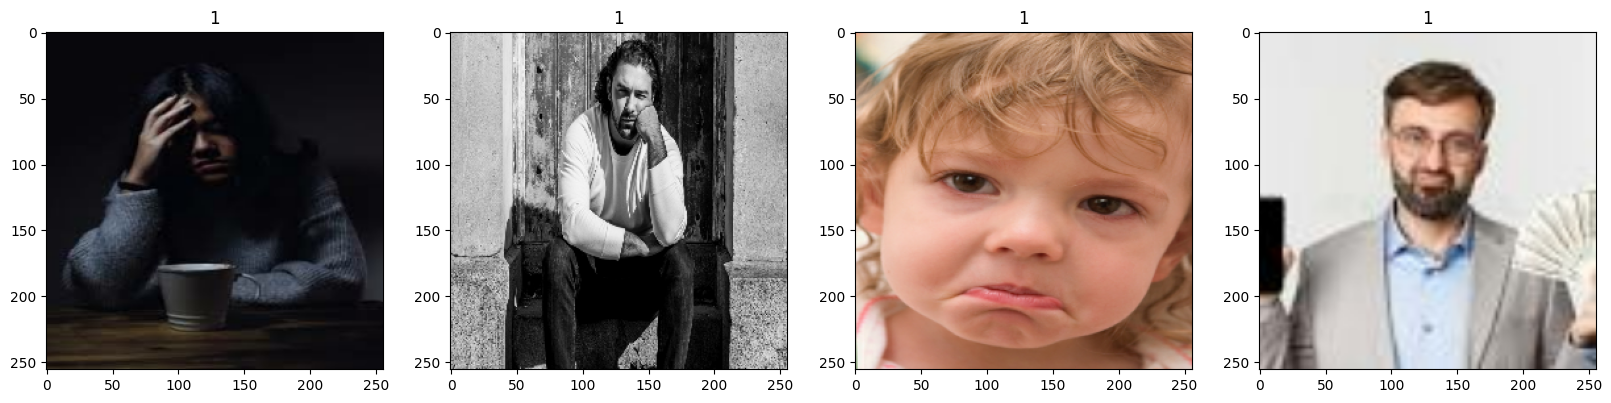

In [15]:
# Erzeuge eine neue Figure mit 4 nebeneinander angeordneten Subplots (Achsen).
# figsize=(20,20) sorgt für eine große Darstellung, sodass die Bilder gut sichtbar sind.
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

# Durchlaufe die ersten 4 Bilder im Batch.
# enumerate liefert sowohl den Index (idx) als auch das Bild (img).
for idx, img in enumerate(batch[0][:4]):
    # Zeige das Bild auf der entsprechenden Achse an.
    # .astype(int) wandelt die Bilddaten in Ganzzahlen um, damit matplotlib sie korrekt darstellt.
    ax[idx].imshow(img.astype(int))
    # Setze den Titel der jeweiligen Achse auf das zugehörige Label aus batch[1].
    ax[idx].title.set_text(batch[1][idx])

# Hinweis:
# - batch[0] enthält die Bilddaten als NumPy-Array.
# - batch[1] enthält die zugehörigen Labels.
# - Mit [:4] werden nur die ersten vier Bilder und Labels verwendet.
# - Die Schleife sorgt dafür, dass jedes Bild und Label auf einer eigenen Achse angezeigt wird.

# 4. Scale Data

In [16]:
# Mit dieser Zeile wird der gesamte Datensatz (data) so transformiert, dass die Bilddaten auf den Wertebereich [0, 1] skaliert werden.
# Das ist ein wichtiger Schritt für Deep Learning, da neuronale Netze besser mit normalisierten Eingabewerten arbeiten.
# Die Funktion .map() wendet eine Lambda-Funktion auf jedes Element des Datensatzes an.
# Jedes Element besteht aus einem Tupel (x, y), wobei:
# - x: Die Bilddaten als Array (ursprünglich Werte von 0 bis 255)
# - y: Das zugehörige Label
# Die Lambda-Funktion teilt die Bilddaten x durch 255, sodass alle Pixelwerte zwischen 0 und 1 liegen.
# Die Labels y bleiben unverändert.
# Das Ergebnis ist ein neuer Datensatz, bei dem alle Bilder skaliert sind.
data = data.map(lambda x, y: (x / 255, y))

In [17]:
# Mit .as_numpy_iterator() wird ein Iterator für den TensorFlow-Datensatz erzeugt,
# der die Daten als NumPy-Arrays liefert. Dies ist hilfreich, um direkt auf die Bild- und Labeldaten zuzugreifen.
# Mit .next() wird die nächste Batch (Stapel) von Bild- und Labeldaten aus dem Iterator abgerufen.
# Das Ergebnis ist ein Tupel:
# - batch[0]: Die Bilddaten als NumPy-Array
# - batch[1]: Die zugehörigen Labels
# Dies eignet sich z.B. für Visualisierungen, Überprüfung der Datenstruktur oder eigene Analysen.
data.as_numpy_iterator().next()

(array([[[[0.5064951 , 0.5692402 , 0.52610296],
          [0.5213235 , 0.58406866, 0.54093134],
          [0.5355392 , 0.5982843 , 0.54901963],
          ...,
          [0.9655637 , 0.96164215, 0.953799  ],
          [0.96862745, 0.9647059 , 0.95686275],
          [0.96862745, 0.9647059 , 0.95686275]],
 
         [[0.5064951 , 0.5692402 , 0.52610296],
          [0.5213235 , 0.58406866, 0.54093134],
          [0.5355392 , 0.5982843 , 0.54901963],
          ...,
          [0.9648684 , 0.96094686, 0.9531037 ],
          [0.96544886, 0.9615273 , 0.95368415],
          [0.96544886, 0.9615273 , 0.95368415]],
 
         [[0.5064951 , 0.5692402 , 0.52610296],
          [0.5213235 , 0.58406866, 0.54093134],
          [0.5355392 , 0.5982843 , 0.54901963],
          ...,
          [0.9647059 , 0.9607843 , 0.9529412 ],
          [0.9647059 , 0.9607843 , 0.9529412 ],
          [0.9647059 , 0.9607843 , 0.9529412 ]],
 
         ...,
 
         [[0.8213654 , 0.6761984 , 0.6055413 ],
          [0.82354

# 5. Split Data

In [18]:
# Berechne die Anzahl der Trainings-, Validierungs- und Testdaten basierend auf dem gesamten Datensatz.
# Die Aufteilung erfolgt nach dem Verhältnis 70% Training, 20% Validierung, 10% Test.
# len(data) gibt die Gesamtanzahl der Batches im Datensatz zurück.
# Die Werte werden jeweils in ganze Zahlen umgewandelt (int), da die .take()- und .skip()-Methoden ganze Zahlen erwarten.

train_size = int(len(data) * 0.7)  # 70% der Daten für das Training
val_size = int(len(data) * 0.2)    # 20% der Daten für die Validierung
test_size = int(len(data) * 0.1)   # 10% der Daten für den Test

# Hinweis:
# - Die Aufteilung ist wichtig, um das Modell auf unterschiedlichen Daten zu trainieren, zu validieren und zu testen.
# - So wird sichergestellt, dass das Modell nicht nur auf die Trainingsdaten passt, sondern auch auf unbekannte Daten generalisiert.

In [19]:
# Zeige die berechnete Anzahl der Trainingsdaten (train_size) an.
# Dies ist hilfreich, um zu überprüfen, wie viele Batches für das Training verwendet werden.
# Die Variable train_size wurde zuvor basierend auf der Gesamtanzahl der Daten berechnet (70% des Datensatzes).
# Die Ausgabe gibt einen schnellen Überblick über die Größe des Trainingsdatensatzes.
train_size

7

In [20]:
# Teile den Datensatz in Trainings-, Validierungs- und Testdaten auf.
# Die Methode .take(n) nimmt die ersten n Batches aus dem Datensatz.
# Die Methode .skip(n) überspringt die ersten n Batches und gibt die restlichen zurück.
# Durch Kombination von .skip() und .take() können gezielt Teilmengen des Datensatzes erstellt werden.

# Trainingsdatensatz:
# - Enthält die ersten 'train_size' Batches des Datensatzes.
# - Wird für das Modelltraining verwendet.
train = data.take(train_size)

# Validierungsdatensatz:
# - Überspringt die ersten 'train_size' Batches und nimmt dann die nächsten 'val_size' Batches.
# - Wird verwendet, um die Modellleistung während des Trainings zu überwachen und Hyperparameter zu optimieren.
val = data.skip(train_size).take(val_size)

# Testdatensatz:
# - Überspringt die ersten 'train_size + val_size' Batches und nimmt dann die nächsten 'test_size' Batches.
# - Wird verwendet, um die endgültige Modellleistung auf unbekannten Daten zu bewerten.
test = data.skip(train_size + val_size).take(test_size)

# Hinweis:
# - Die Aufteilung ist wichtig, um Überanpassung zu vermeiden und die Generalisierungsfähigkeit des Modells zu testen.
# - Die Variablen 'train_size', 'val_size' und 'test_size' wurden zuvor berechnet und basieren auf der Gesamtanzahl der Batches im Datensatz.

# 6. Build Deep Learning Model

In [21]:
# Der Ausdruck 'train' gibt das Trainingsdatensatz-Objekt zurück, das zuvor aus dem gesamten Datensatz erstellt wurde.
# Es handelt sich um ein tf.data.Dataset-Objekt, das die ersten 'train_size' Batches enthält.
# Dieses Objekt wird für das Training des Deep-Learning-Modells verwendet.
# Die Ausgabe zeigt die Struktur des Datensatzes, z.B. die Batch-Größe, die Form der Bilddaten und die Labels.
# Dies ist hilfreich, um zu überprüfen, ob die Aufteilung und Vorbereitung des Trainingsdatensatzes korrekt erfolgt ist.
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
# Importiere die Klasse Sequential, um ein sequentielles Modell zu erstellen.
from tensorflow.keras.models import Sequential

# Importiere die wichtigsten Layer für ein Convolutional Neural Network:
# - Conv2D: Faltet das Bild mit mehreren Filtern, um Merkmale zu extrahieren.
# - MaxPooling2D: Reduziert die räumliche Größe der Feature-Maps und hilft, Überanpassung zu vermeiden.
# - Dense: Vollständig verbundene Schicht, die komplexe Zusammenhänge lernt.
# - Flatten: Wandelt die mehrdimensionalen Feature-Maps in einen eindimensionalen Vektor um.
# - Dropout: Deaktiviert zufällig Neuronen während des Trainings, um Überanpassung zu verhindern.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
# Erstelle ein neues sequentielles Modell-Objekt.
# Das Sequential-Modell ist die einfachste Möglichkeit, ein Deep-Learning-Modell in Keras zu definieren.
# Es erlaubt, Schichten (Layers) nacheinander hinzuzufügen, wobei jede Schicht genau einen Eingabe- und einen Ausgabetensor hat.
# Dieses Modell eignet sich besonders für lineare Stapel von Schichten, wie sie bei klassischen Convolutional Neural Networks (CNNs) verwendet werden.
# Nach der Initialisierung können mit .add() weitere Schichten hinzugefügt werden (siehe nächste Zelle).
model = Sequential()

In [24]:
# Füge die erste Convolution-Schicht hinzu:
# Conv2D mit 16 Filtern, Kernelgröße 3x3, Schrittweite 1, ReLU-Aktivierung.
# Die input_shape gibt die erwartete Eingabegröße an (256x256 Pixel, 3 Farbkanäle).
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))

# Füge eine MaxPooling-Schicht hinzu:
# Diese reduziert die räumliche Größe der Feature-Maps und hilft, Überanpassung zu vermeiden.
model.add(MaxPooling2D())

# Zweite Convolution-Schicht:
# Mehr Filter (32), um komplexere Merkmale zu extrahieren.
model.add(Conv2D(32, (3,3), 1, activation='relu'))

# MaxPooling reduziert erneut die Größe der Feature-Maps.
model.add(MaxPooling2D())

# Dritte Convolution-Schicht:
# Wieder 16 Filter, um weitere Merkmale zu erfassen.
model.add(Conv2D(16, (3,3), 1, activation='relu'))

# Nochmals MaxPooling.
model.add(MaxPooling2D())

# Flatten-Schicht:
# Wandelt die mehrdimensionalen Feature-Maps in einen eindimensionalen Vektor um,
# damit sie von Dense-Schichten verarbeitet werden können.
model.add(Flatten())

# Dense-Schicht mit 256 Neuronen und ReLU-Aktivierung:
# Lernt komplexe Zusammenhänge aus den extrahierten Merkmalen.
model.add(Dense(256, activation='relu'))

# Ausgabeschicht:
# Dense mit 1 Neuron und Sigmoid-Aktivierung für binäre Klassifikation (z.B. Happy/Sad).
model.add(Dense(1, activation='sigmoid'))

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Kompiliere das Modell für das Training.
# Die compile()-Methode konfiguriert das Modell mit folgenden Parametern:
# - Optimierer: 'adam' ist ein weit verbreiteter Optimierungsalgorithmus, der adaptiv die Lernrate anpasst und für viele Deep-Learning-Anwendungen geeignet ist.
# - Verlustfunktion: BinaryCrossentropy wird verwendet, da es sich um ein binäres Klassifikationsproblem handelt (z.B. Happy/Sad).
#   tf.losses.BinaryCrossentropy() berechnet den Unterschied zwischen den vorhergesagten und den tatsächlichen Klassen.
# - Metriken: 'accuracy' misst die Genauigkeit des Modells während des Trainings und der Validierung.
#   Sie gibt an, wie viele Vorhersagen korrekt sind.
model.compile(
    optimizer='adam',                                 # Optimierer für die Gewichtsaktualisierung
    loss=tf.losses.BinaryCrossentropy(),              # Verlustfunktion für binäre Klassifikation
    metrics=['accuracy']                              # Metrik zur Bewertung der Modellleistung
)

In [26]:
# Mit model.summary() wird eine Übersicht über die Architektur des Deep-Learning-Modells ausgegeben.
# Die Zusammenfassung zeigt:
# - Die Reihenfolge und den Typ der einzelnen Schichten (Layers), z.B. Conv2D, MaxPooling2D, Dense usw.
# - Die Ausgabedimensionen (Output Shape) jeder Schicht, also wie sich die Daten durch das Netzwerk verändern.
# - Die Anzahl der zu trainierenden Parameter (Weights) pro Schicht und insgesamt.
# Dies ist hilfreich, um die Struktur des Modells zu überprüfen und sicherzustellen, dass die Schichten korrekt miteinander verbunden sind.
# Außerdem kann man so abschätzen, wie komplex das Modell ist und ob die Anzahl der Parameter für das Problem angemessen ist.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [27]:
# Definiere das Verzeichnis, in dem die TensorBoard-Logs gespeichert werden sollen.
# TensorBoard ist ein Tool zur Visualisierung von Trainingsmetriken, Modellarchitektur und mehr.
# Das Log-Verzeichnis ('logs') wird verwendet, um während des Trainings automatisch Protokolldateien zu speichern.
# Diese Dateien können später mit TensorBoard angezeigt werden, um z.B. den Verlauf von Verlust und Genauigkeit zu analysieren.
# Beispiel für die Verwendung:
# - Nach dem Training kann TensorBoard mit dem Befehl "tensorboard --logdir logs" gestartet werden.
# - Im Browser kann dann die URL angezeigt werden, die TensorBoard ausgibt (z.B. http://localhost:6006).
logdir = 'logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30


2025-08-25 19:06:37.822633: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.5170 - loss: 0.8081

2025-08-25 19:06:44.641011: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 933ms/step - accuracy: 0.5446 - loss: 0.8942 - val_accuracy: 0.4688 - val_loss: 0.8571
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.5453 - loss: 0.7328

2025-08-25 19:06:50.850745: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 952ms/step - accuracy: 0.5402 - loss: 0.6908 - val_accuracy: 0.5938 - val_loss: 0.5436
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.7145 - loss: 0.5881

2025-08-25 19:06:57.056141: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 820ms/step - accuracy: 0.7679 - loss: 0.5844 - val_accuracy: 0.8438 - val_loss: 0.5076
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 803ms/step - accuracy: 0.8259 - loss: 0.4729 - val_accuracy: 0.8125 - val_loss: 0.3784
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 812ms/step - accuracy: 0.8482 - loss: 0.3838 - val_accuracy: 0.9062 - val_loss: 0.3982
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.8657 - loss: 0.3580

2025-08-25 19:07:22.897195: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 797ms/step - accuracy: 0.8839 - loss: 0.3427 - val_accuracy: 0.9844 - val_loss: 0.1984
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 909ms/step - accuracy: 0.9330 - loss: 0.2760 - val_accuracy: 0.9375 - val_loss: 0.2291
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.9473 - loss: 0.2167

2025-08-25 19:07:34.607588: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 867ms/step - accuracy: 0.9554 - loss: 0.1802 - val_accuracy: 0.9844 - val_loss: 0.1033
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.9661 - loss: 0.1208

2025-08-25 19:07:41.395659: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 774ms/step - accuracy: 0.9598 - loss: 0.1203 - val_accuracy: 0.9531 - val_loss: 0.1125
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.9960 - loss: 0.0560

2025-08-25 19:07:47.352240: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 759ms/step - accuracy: 0.9911 - loss: 0.0699 - val_accuracy: 0.9688 - val_loss: 0.1084
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.9906 - loss: 0.0419

2025-08-25 19:07:53.483881: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 819ms/step - accuracy: 0.9911 - loss: 0.0443 - val_accuracy: 0.9844 - val_loss: 0.0648
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.9685 - loss: 0.0828

2025-08-25 19:08:03.231228: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 782ms/step - accuracy: 0.9777 - loss: 0.0707 - val_accuracy: 0.9844 - val_loss: 0.0360
Epoch 13/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.9977 - loss: 0.0465

2025-08-25 19:08:14.362115: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 935ms/step - accuracy: 0.9955 - loss: 0.0417 - val_accuracy: 1.0000 - val_loss: 0.0094
Epoch 14/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.9884 - loss: 0.0343

2025-08-25 19:08:19.704711: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 789ms/step - accuracy: 0.9955 - loss: 0.0210 - val_accuracy: 0.9844 - val_loss: 0.0245
Epoch 15/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 934ms/step - accuracy: 0.9955 - loss: 0.0173 - val_accuracy: 1.0000 - val_loss: 0.0150
Epoch 16/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 1.0000 - loss: 0.0101

2025-08-25 19:08:32.217290: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 841ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 17/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 1.0000 - loss: 0.0063

2025-08-25 19:08:41.976258: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 808ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 18/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 930ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.9844 - val_loss: 0.0204
Epoch 19/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 803ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 20/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 934ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 21/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 946ms/step - accuracy: 0.9955 - loss: 0.0111 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 22/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.9878 - loss: 0.0148

2025-08-25 19:09:17.890669: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 867ms/step - accuracy: 0.9911 - loss: 0.0119 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 23/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 781ms/step - accuracy: 0.9955 - loss: 0.0098 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 24/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.9884 - loss: 0.0180

2025-08-25 19:09:32.948116: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 840ms/step - accuracy: 0.9955 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 25/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 798ms/step - accuracy: 0.9955 - loss: 0.0093 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 26/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.9884 - loss: 0.0111

2025-08-25 19:09:45.082966: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 924ms/step - accuracy: 0.9955 - loss: 0.0052 - val_accuracy: 0.9844 - val_loss: 0.0216
Epoch 27/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 949ms/step - accuracy: 0.9911 - loss: 0.0120 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 28/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 752ms/step - accuracy: 0.9955 - loss: 0.0079 - val_accuracy: 0.9844 - val_loss: 0.0179
Epoch 29/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 1.0000 - loss: 0.0022

2025-08-25 19:10:08.144813: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 912ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 8.5060e-04
Epoch 30/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.9977 - loss: 0.0080

2025-08-25 19:10:15.029340: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 897ms/step - accuracy: 0.9955 - loss: 0.0101 - val_accuracy: 1.0000 - val_loss: 0.0011


# 8. Plot Performance

In [30]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 58081), started 0:06:46 ago. (Use '!kill 58081' to kill it.)

In [31]:
import pandas as pd
import plotly.express as px

# Erstelle ein DataFrame mit den Trainings- und Validierungsverlusten sowie den Epochenzahlen
loss_df = pd.DataFrame({
    'loss': hist.history['loss'],         # Trainingsverlust pro Epoche
    'val_loss': hist.history['val_loss'], # Validierungsverlust pro Epoche
    'epoch': range(1, len(hist.history['loss']) + 1) # Epochennummern (startend bei 1)
})

# Erzeuge ein Liniendiagramm mit Plotly Express
# Die x-Achse zeigt die Epoche, die y-Achse zeigt die Werte für Trainings- und Validierungsverlust
# Das Diagramm erhält Achsenbeschriftungen und einen Titel
fig = px.line(
    loss_df, 
    x='epoch', 
    y=['loss', 'val_loss'], 
    labels={'value': 'Loss', 'epoch': 'Epoch'}, 
    title='Loss'
)

# Zeige das Diagramm im Notebook an
fig.show()

In [32]:
import pandas as pd

import plotly.express as px

# Erstelle ein DataFrame mit den Trainings- und Validierungsgenauigkeiten sowie den Epochenzahlen
acc_df = pd.DataFrame({
    'accuracy': hist.history['accuracy'],         # Trainingsgenauigkeit pro Epoche
    'val_accuracy': hist.history['val_accuracy'], # Validierungsgenauigkeit pro Epoche
    'epoch': range(1, len(hist.history['accuracy']) + 1) # Epochennummern (startend bei 1)
})

# Erzeuge ein Liniendiagramm mit Plotly Express
# Die x-Achse zeigt die Epoche, die y-Achse zeigt die Werte für Trainings- und Validierungsgenauigkeit
# Das Diagramm erhält Achsenbeschriftungen und einen Titel
fig = px.line(
    acc_df, 
    x='epoch', 
    y=['accuracy', 'val_accuracy'], 
    labels={'value': 'Accuracy', 'epoch': 'Epoch'}, 
    title='Model Accuracy'
)

# Zeige das Diagramm im Notebook an
fig.show()

# 9. Evaluate

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


2025-08-25 19:10:23.128444: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [37]:
import cv2

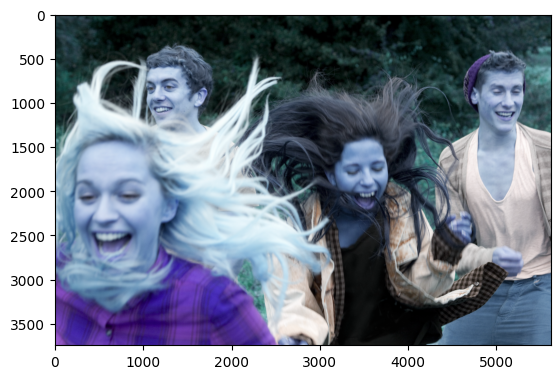

In [38]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

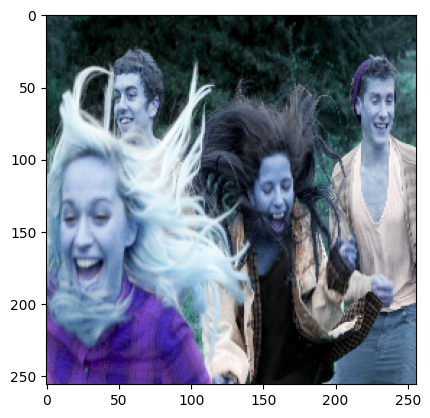

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


In [41]:
yhat

array([[0.00952487]], dtype=float32)

In [42]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [43]:
from tensorflow.keras.models import load_model

In [44]:
model.save(os.path.join('models','imageclassifier.h5'))

In [45]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

In [46]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[0.00952487]], dtype=float32)